# **Credit Card Exploratory Data Analysis** 

Dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

# Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 
from pylab import rcParams

# Upload the dataset

In [2]:
data = pd.read_csv('creditcard.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'creditcard.csv'

In [ ]:
df=pd.DataFrame(data)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Split the data based on class - fraud and normal

In [ ]:
fraud =df[df.Class==1]
normal =df[df.Class==0]

print(f"Fraud : {fraud.shape}")
print(f"Normal : {normal.shape}")

Fraud : (492, 31)
Normal : (284315, 31)


In [ ]:
print('Fraudulent transactions: ', len(fraud))

print('Normal transactions: ', len(normal))

Fraudulent transactions:  492
Normal transactions:  284315


The dataset is highly imbalanced and biased towards normal dataset

# Visualization

C:\Users\somai\AppData\Local\Temp\ipykernel_13508\583077931.py:3: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



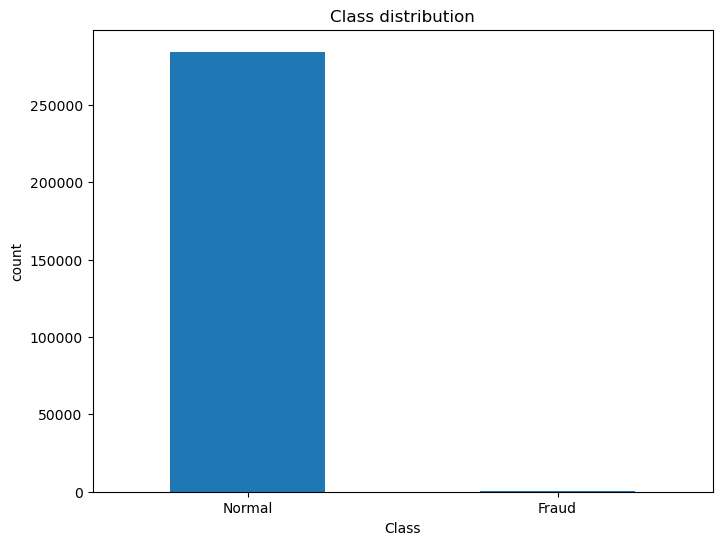

In [ ]:
# plot the bar distribution of class

class_count=pd.value_counts(df['Class'],sort=True)

class_count.plot(kind='bar', rot=0, figsize=(8,6), title='Class distribution')
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.ylabel("count")
plt.show()

In [ ]:
# plot the class distribution

fig = go.Figure(data=[go.Pie(labels=['Normal', 'Fraud'], values=[len(normal), len(fraud)])])

fig.show()

In [ ]:
normal.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [ ]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Plot the distribution of amount for fraud and normal transactions

In [ ]:
# plot the distribution of amount for fraud and normal transactions

def plot_hist(df, bins,column, log_scale=True):
    bins =100
    fraud =df[df.Class==1]
    normal =df[df.Class==0]
    fig,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(6,4))
    fig.suptitle(f"Counts of {column} transaction")
    ax1.hist(fraud[column], bins = bins, color='r', alpha=0.5, density=True)
    ax1.set_title('Fraud')
    
    ax2.hist(normal[column], bins = bins, color='g', alpha=0.5, density=True)
    ax2.set_title('Normal')
    
    plt.xlabel(column)
    plt.ylabel("Count")
    
    if log_scale:
        plt.yscale('log')
    
    plt.xlim((np.min(df[column]), np.max(df[column])))
    plt.show()

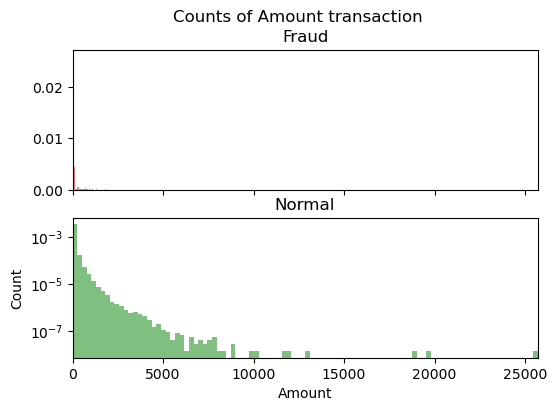

In [ ]:
bins =100
plot_hist(df, bins, 'Amount')

It seems that the data is skewed right and the fraud transactions don't have high values. 

Text(0.5, 1.0, 'Normal')

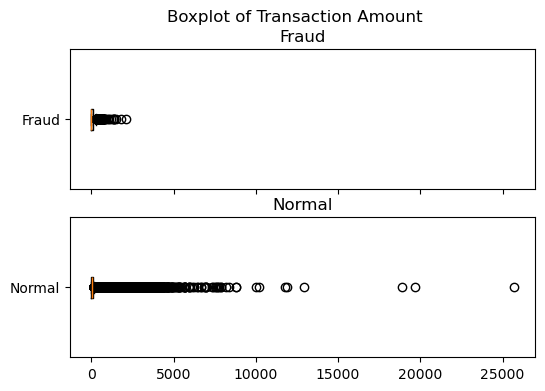

In [ ]:
# Boxplot of normal and fraudulent transactions

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
fig.suptitle('Boxplot of Transaction Amount')

ax1.boxplot(fraud.Amount, vert=False, labels=['Fraud'])
ax1.set_title('Fraud')

ax2.boxplot(normal.Amount, vert=False, labels=['Normal'])
ax2.set_title('Normal')

We can visually see that there are outliers with heavey amount in normal dataset

In [ ]:
# find the outliers

fraud_outliers = fraud[fraud.Amount > 10000]
normal_outliers = normal[normal.Amount > 2500]

print(f"Fraudulent outliers: {fraud_outliers.shape}")
print(f"Normal outliers: {normal_outliers.shape}")

Fraudulent outliers: (0, 31)
Normal outliers: (440, 31)


# Comparison between fraudulent and normal transactions wrt amount

Text(0.5, 0, 'Transaction index')

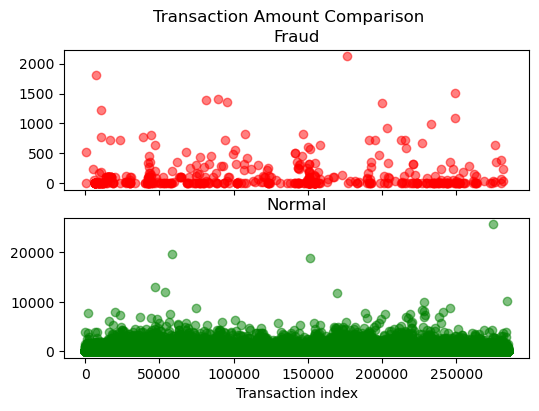

In [ ]:
# Comparison between fraudulent and normal transactions wrt amount

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 4), sharex=True)
fig.suptitle('Transaction Amount Comparison')

ax1.scatter(fraud.index, fraud.Amount, color='r', alpha=0.5)
ax1.set_title('Fraud')

ax2.scatter(normal.index, normal.Amount, color='g', alpha=0.5)
ax2.set_title('Normal')

plt.xlabel('Transaction index')

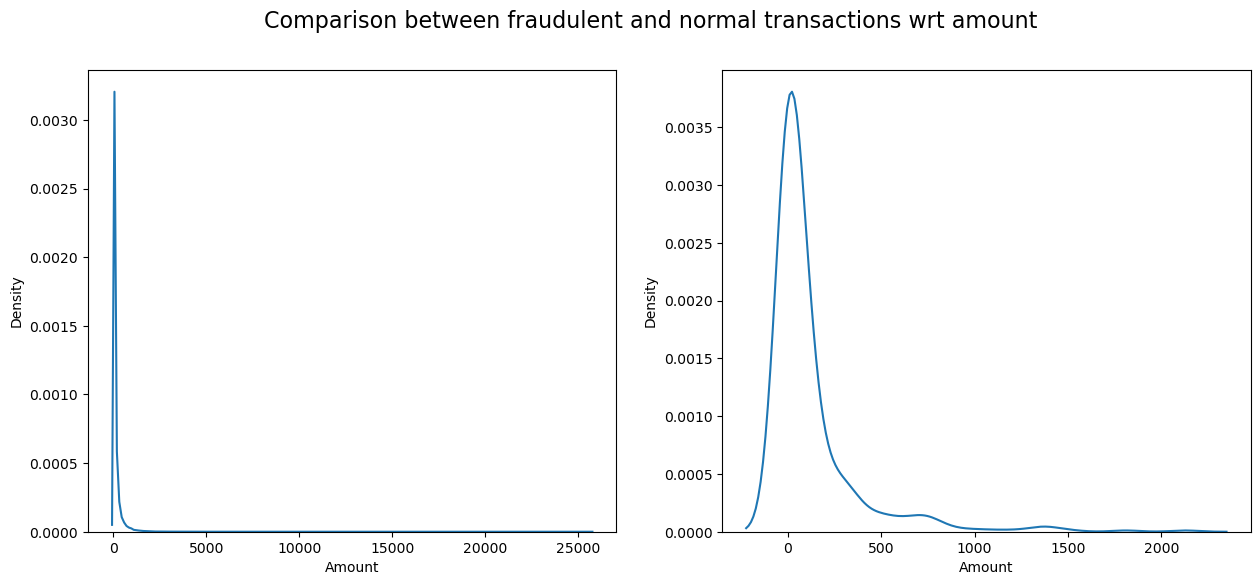

In [ ]:
fig,ax=plt.subplots(1,2,figsize= (15,6))
fig.suptitle("Comparison between fraudulent and normal transactions wrt amount", fontsize=16)

sns.kdeplot(normal["Amount"],label="Amount",ax=ax[0])
sns.kdeplot(fraud["Amount"],label="FraudAmount",ax=ax[1])

plt.show()
            
            


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


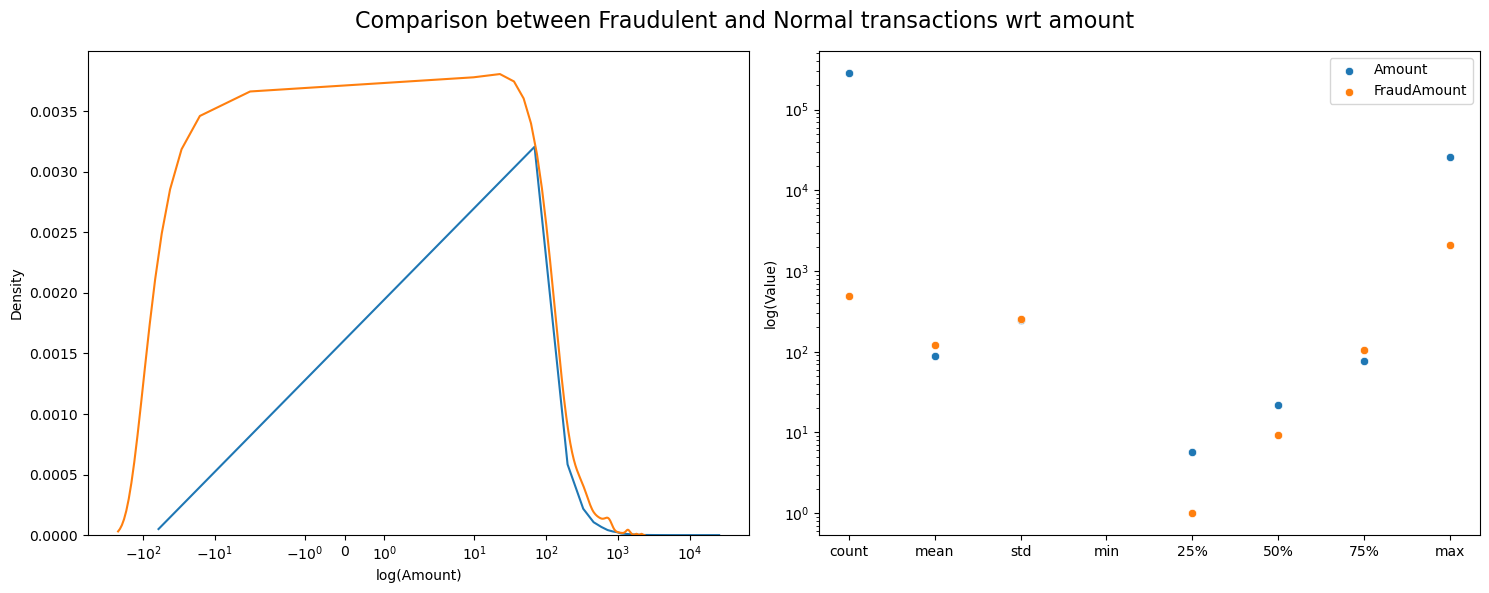

In [ ]:
fig,ax=plt.subplots(1,2,figsize= (15,6))
fig.suptitle("Comparison between Fraudulent and Normal transactions wrt amount", fontsize=16)

sns.kdeplot(normal["Amount"],label="Amount",ax=ax[0])
sns.kdeplot(fraud["Amount"],label="FraudAmount",ax=ax[0])
ax[0].set_xscale('symlog')
ax[0].set_xlabel('log(Amount)')
ax[0].set_ylabel('Density')
plt.legend()

plt.subplot(1,2,2)

sns.scatterplot(normal["Amount"].describe(),label="Amount",ax=ax[1])
sns.scatterplot(fraud["Amount"].describe(),label="FraudAmount",ax=ax[1])
ax[1].set_yscale('log')
ax[1].set_ylabel('log(Value)')
plt.tight_layout()

plt.show()

For low amount of transactions, the probability of fraud is more than a regular transaction, but most of the transactions are normal.

# Comparison between Fraud and normal transactions wrt time

Text(0.5, 0.98, 'Fraud vs Normal transactions wrt features')

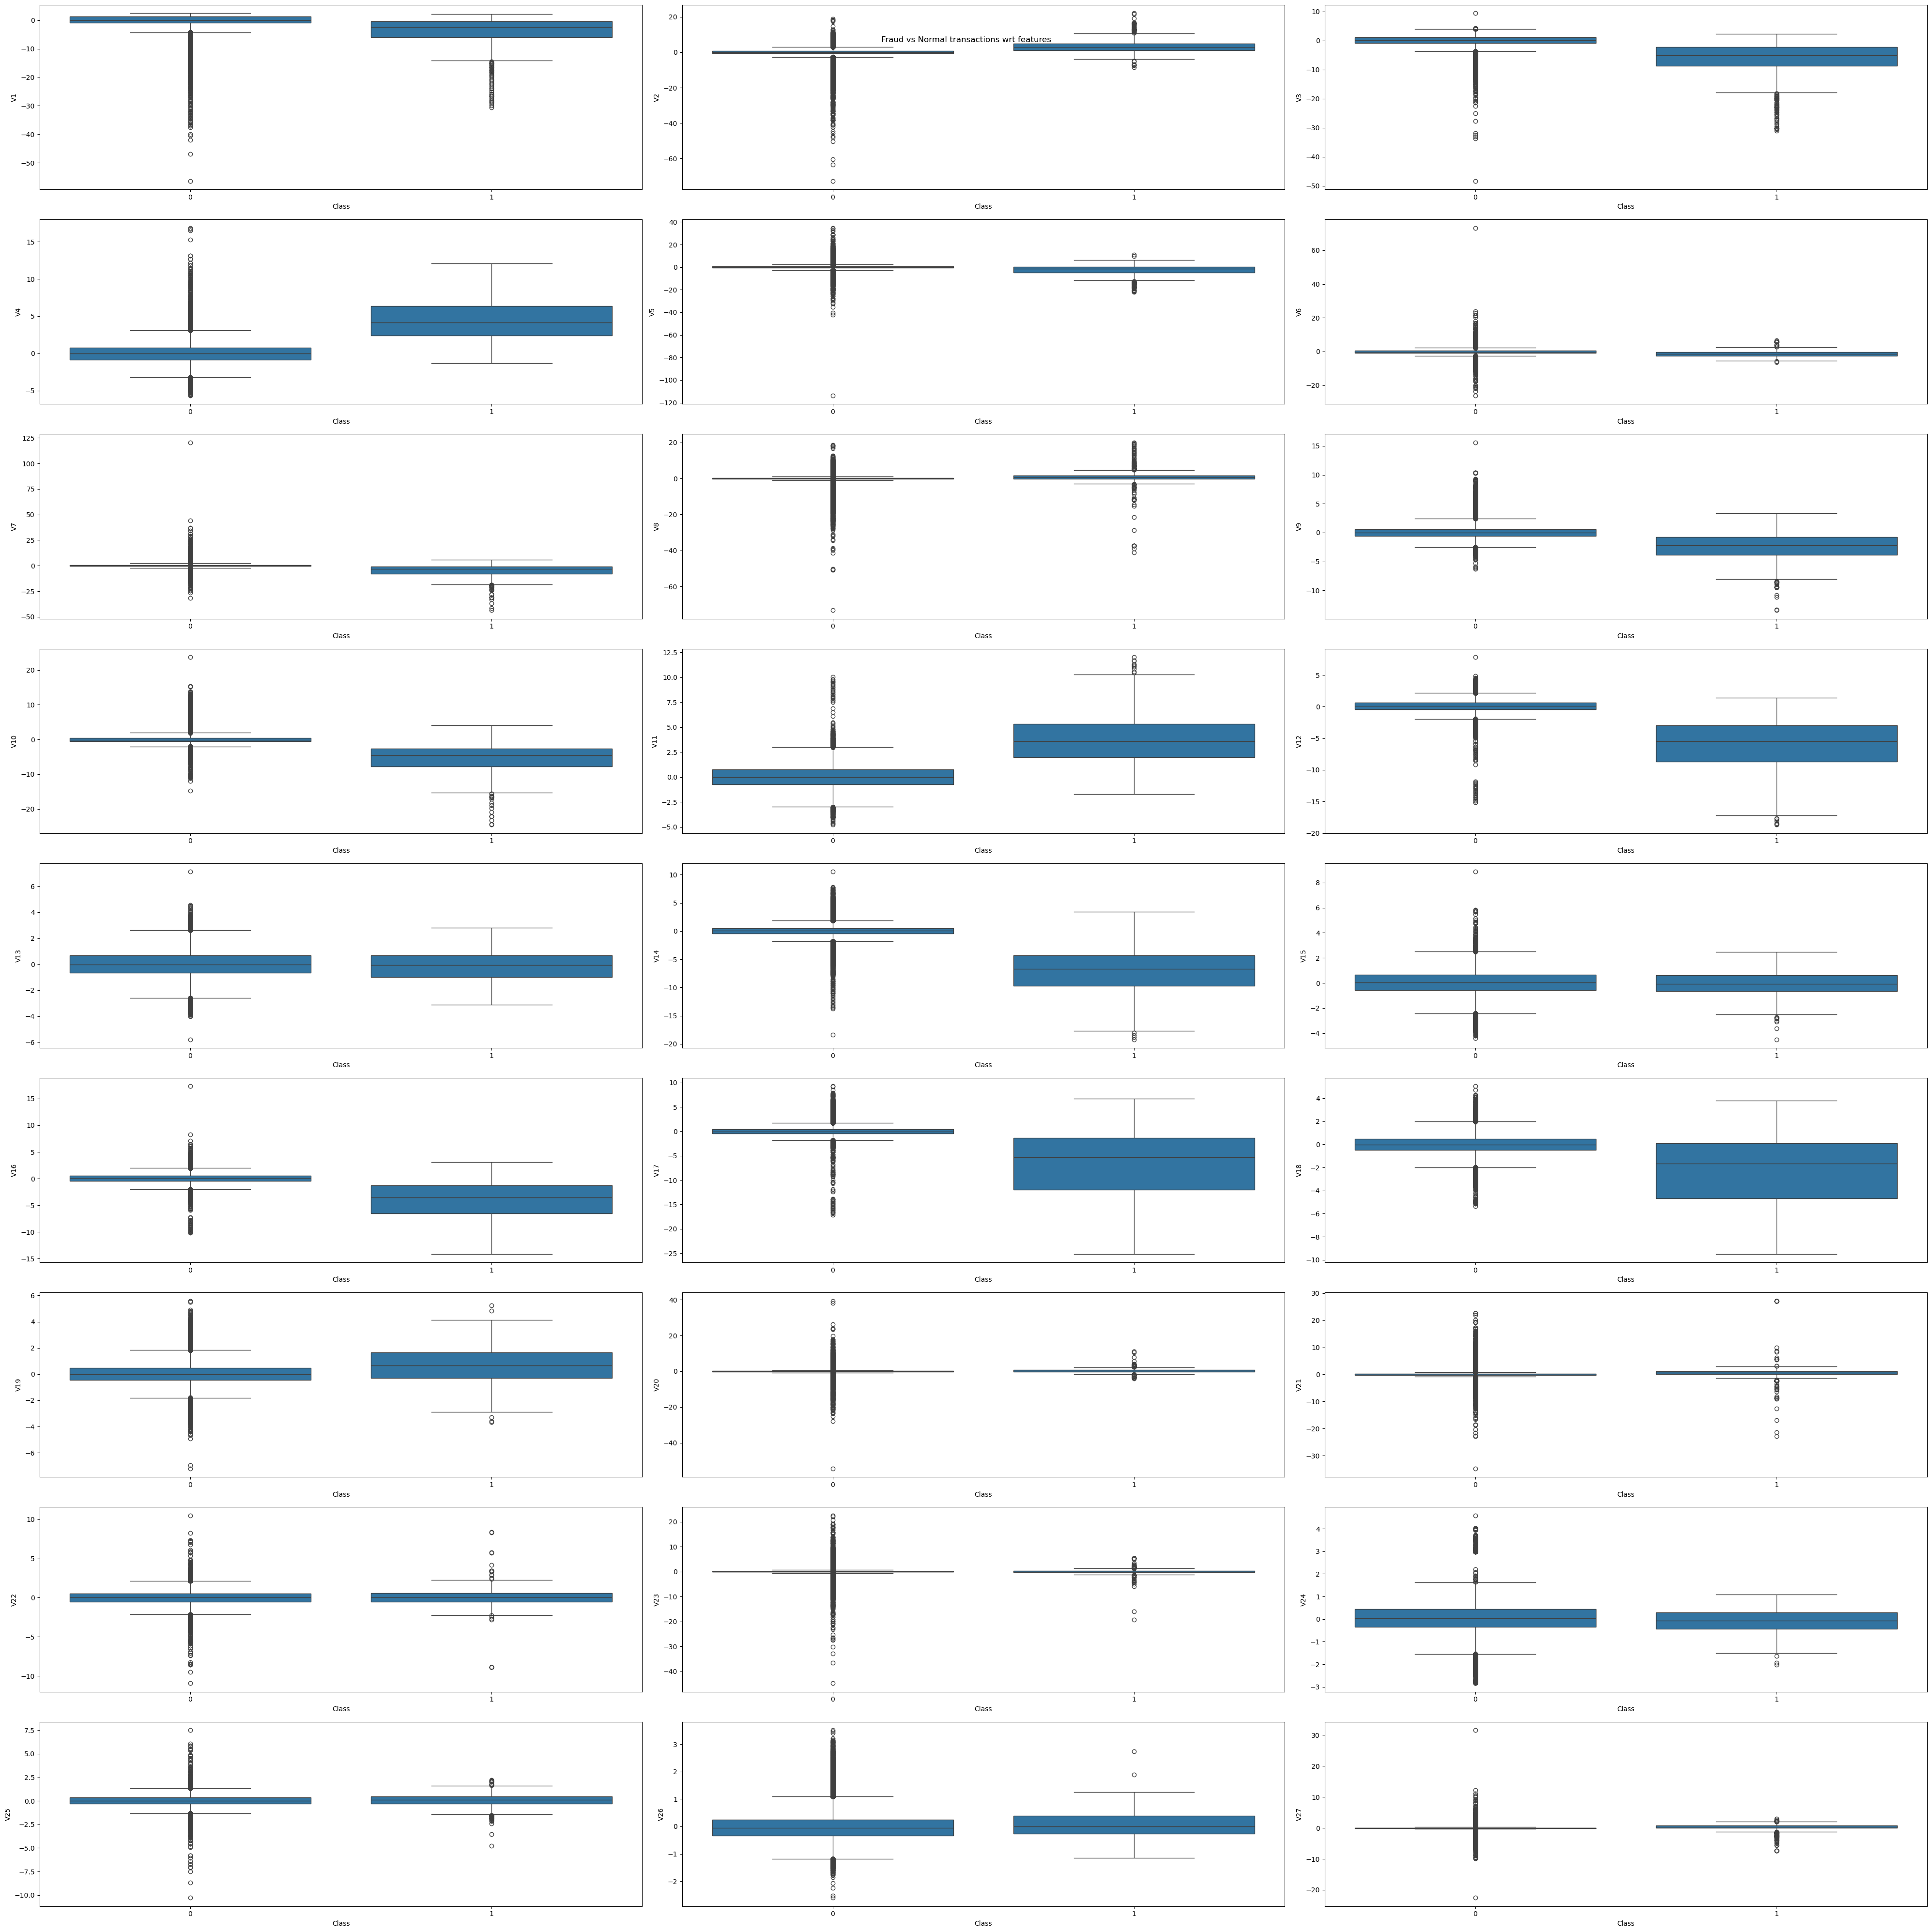

In [ ]:
fig,ax=plt.subplots(9,3,figsize=(40,40))
ax=ax.flatten()

for i,column in enumerate(df.columns[1:28]):
    sns.boxplot(x='Class',y=column,data=df,ax=ax[i])
    
    plt.xlabel('Class')
    plt.ylabel(column)
    plt.tight_layout()
    
fig.suptitle('Fraud vs Normal transactions wrt features')

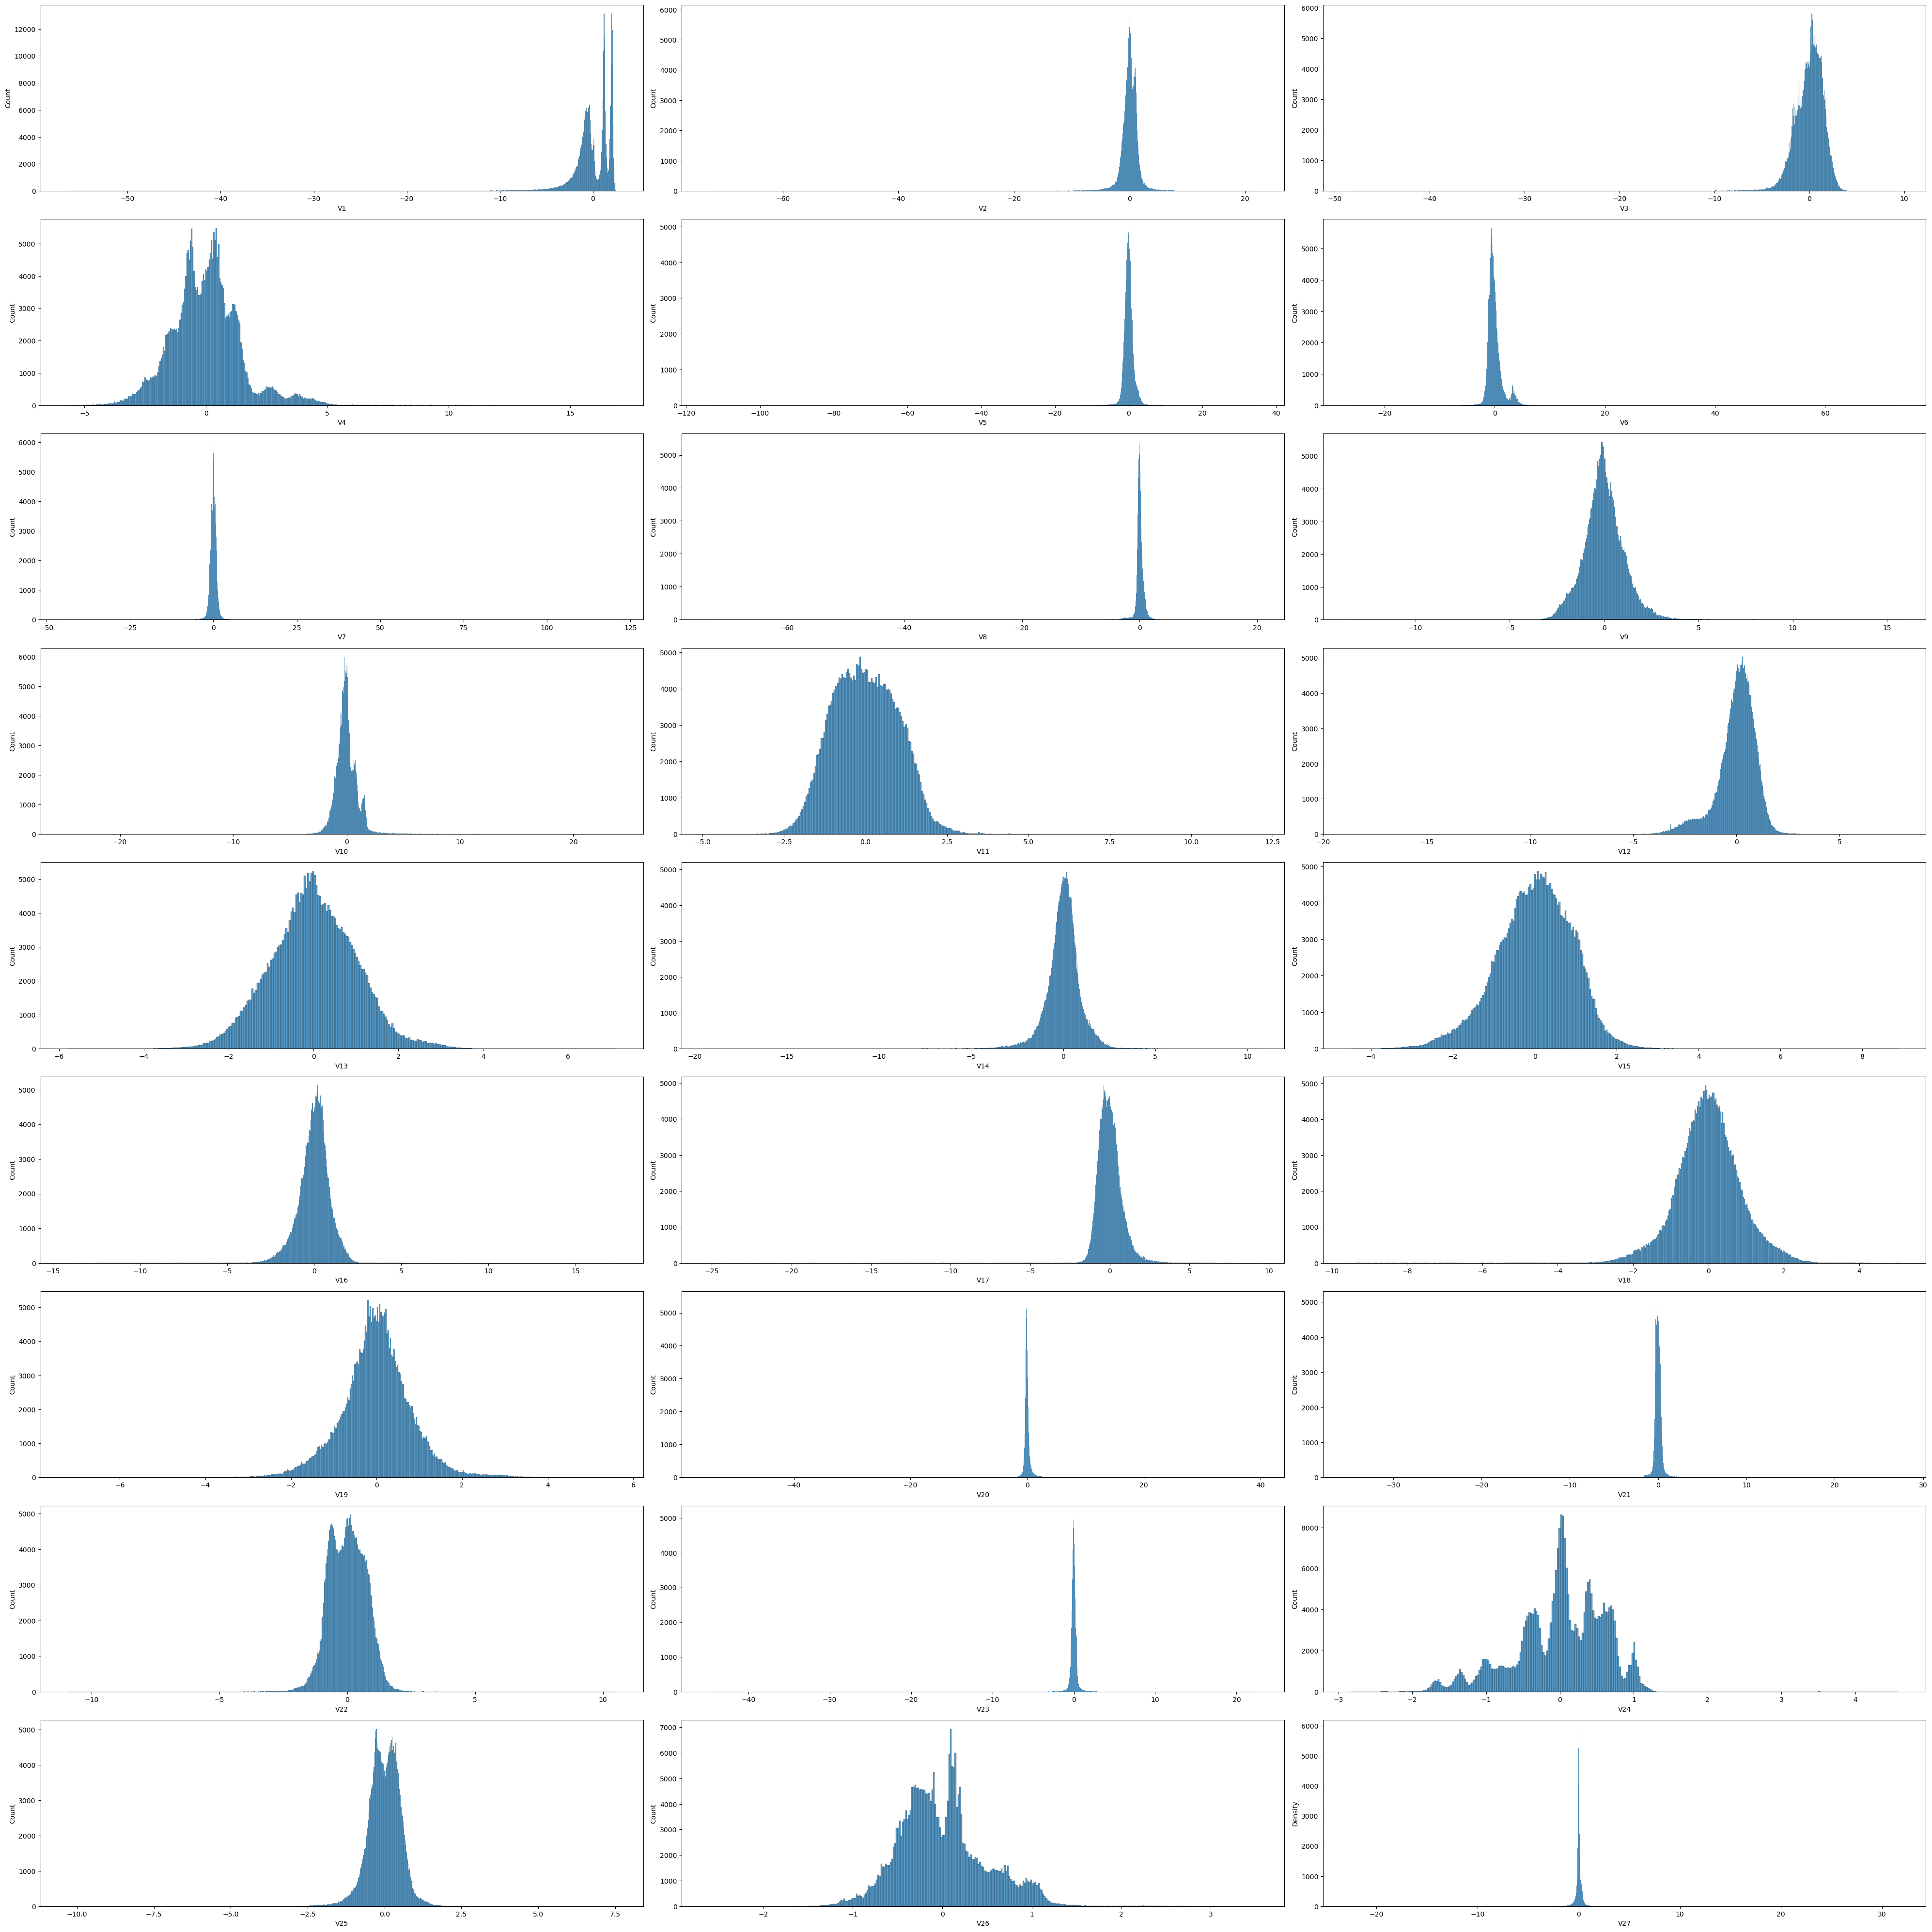

In [ ]:
fig,ax = plt.subplots(9,3,figsize=(40,40))
ax=ax.flatten()

for i, column in enumerate(df.columns[1:28]):
    sns.histplot(data=df,x=df[column], ax=ax[i])
    
    plt.xlabel(column)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()

# Feature selection using correlation

<Axes: >

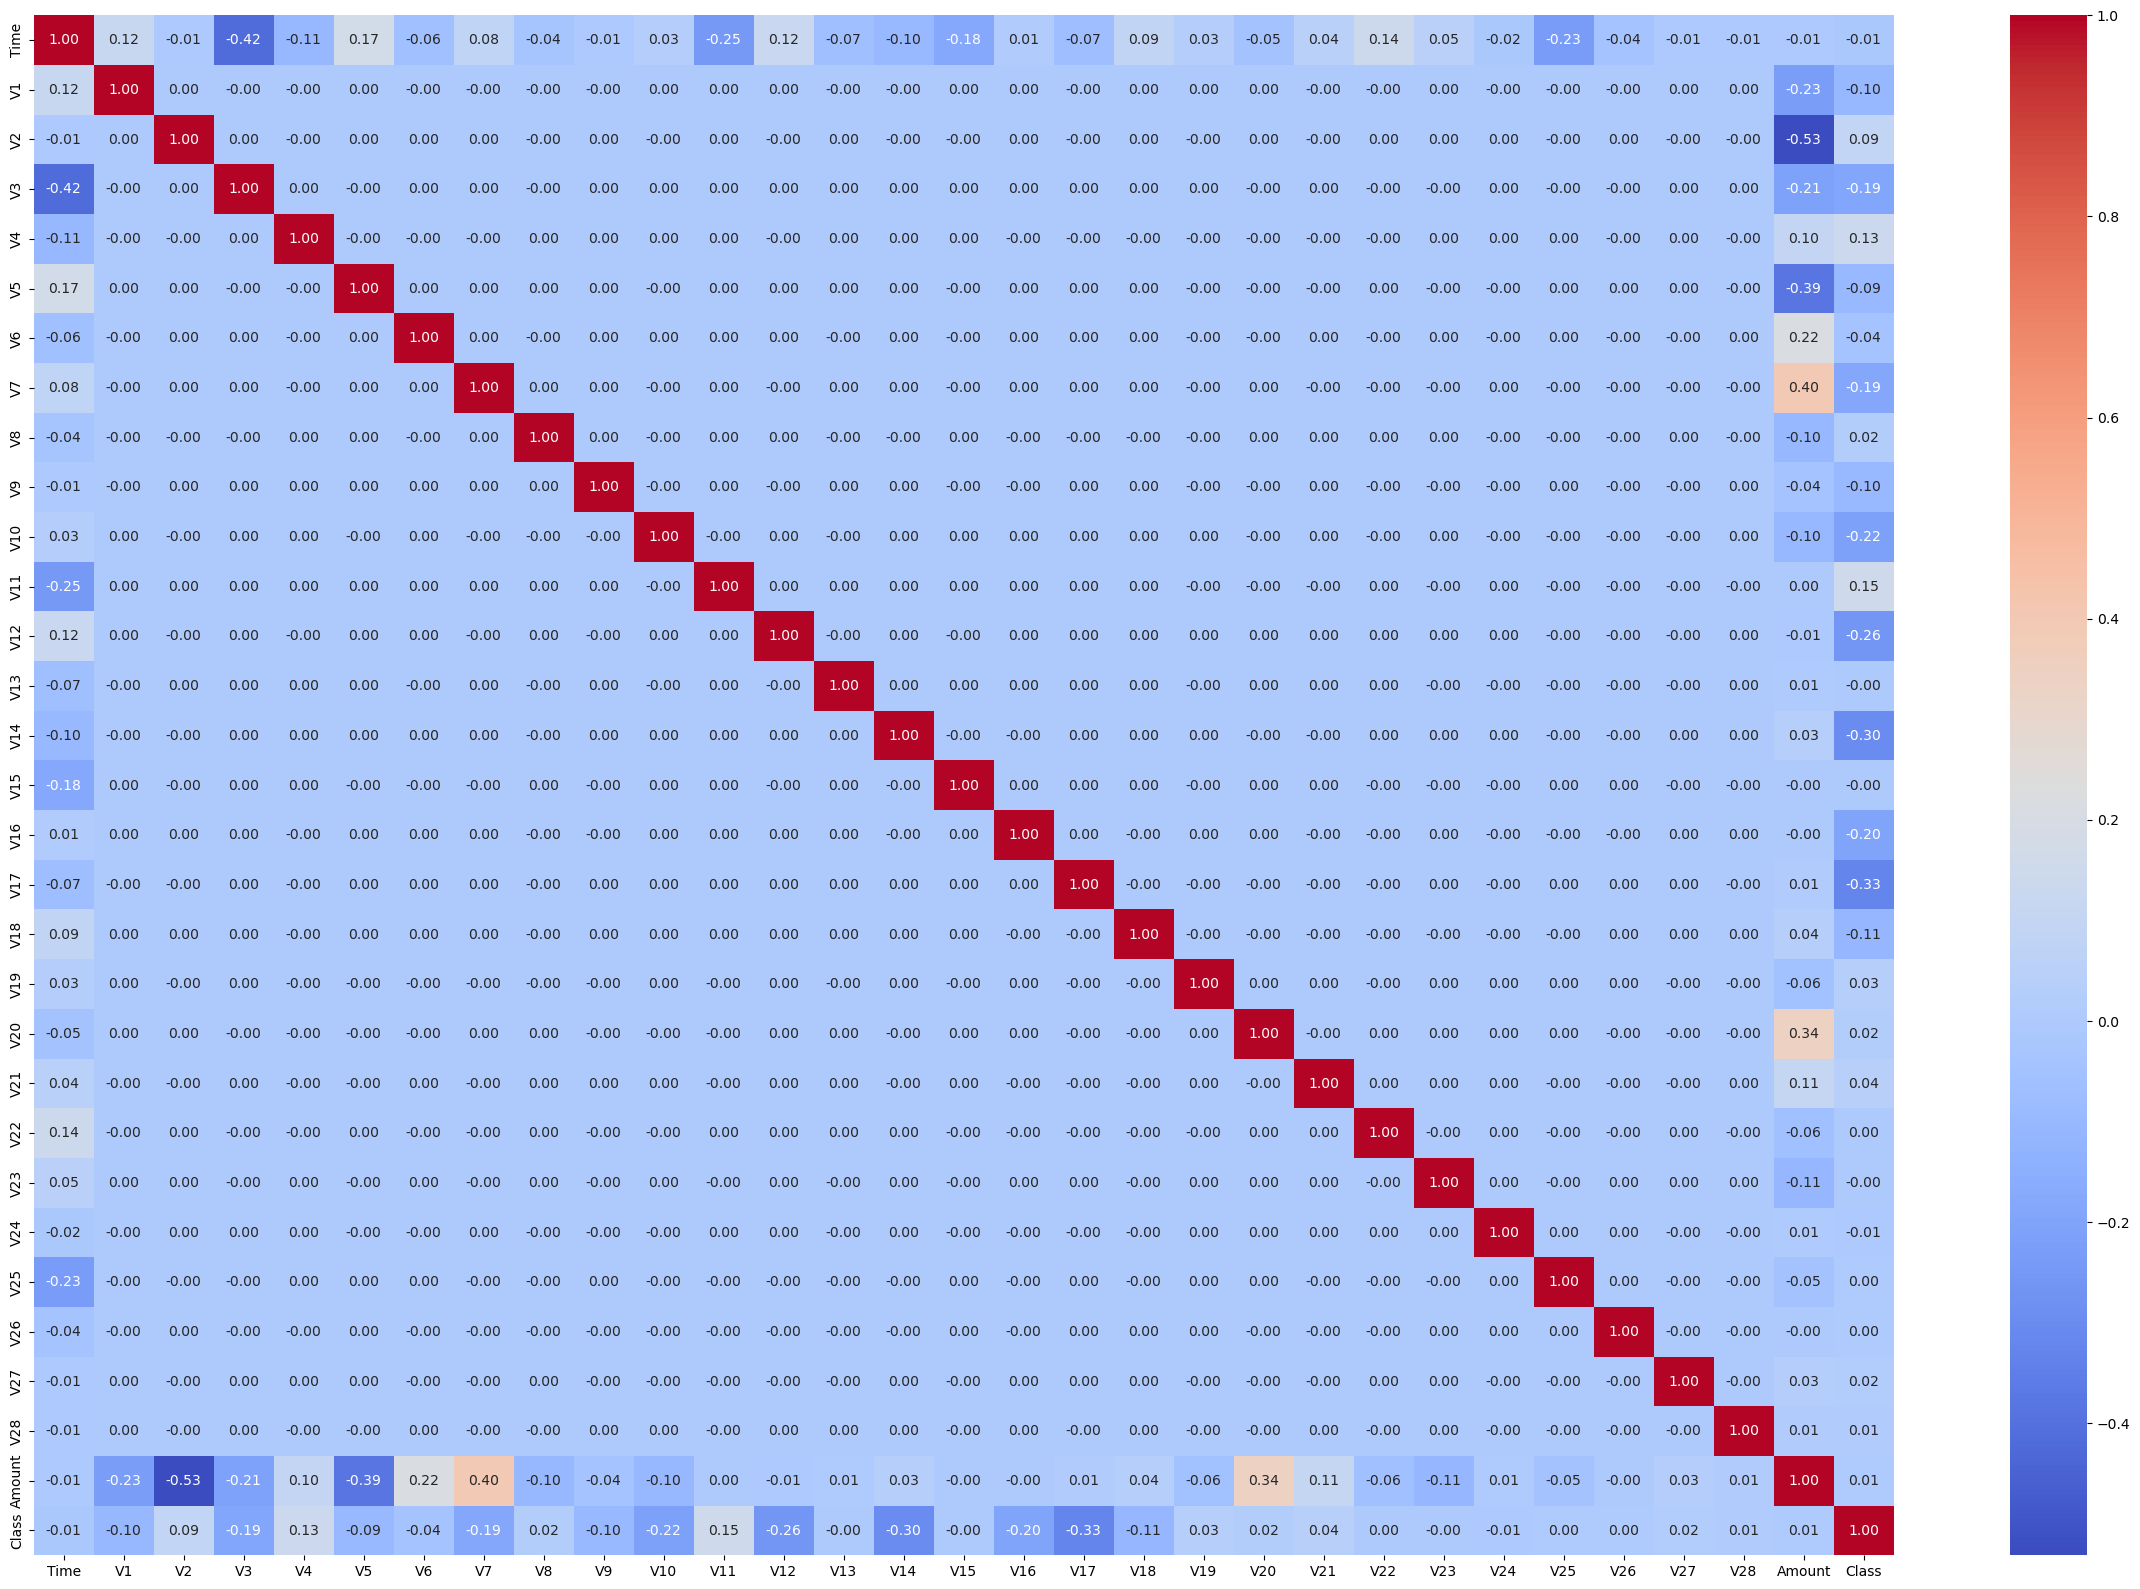

In [ ]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='coolwarm' ,fmt='.2f')


In [ ]:
#dropping the columns having correlation less than 0.13
for corr,column in zip(df.corr().iloc[30],df.columns):
    if abs(corr) <0.13:
        print(f"{column} has a correlation with Class: {corr}")
        
        df.drop(columns=column,inplace=True)

Time has a correlation with Class: -0.012322570929245588
V1 has a correlation with Class: -0.10134729859508294
V2 has a correlation with Class: 0.0912886503446179
V5 has a correlation with Class: -0.09497429899144802
V6 has a correlation with Class: -0.04364316069996494
V8 has a correlation with Class: 0.019875123914794384
V9 has a correlation with Class: -0.0977326860740807
V13 has a correlation with Class: -0.004569778799461309
V15 has a correlation with Class: -0.004223402267856675
V18 has a correlation with Class: -0.11148525388904133
V19 has a correlation with Class: 0.034783013036515056
V20 has a correlation with Class: 0.020090324196974638
V21 has a correlation with Class: 0.04041338061057565
V22 has a correlation with Class: 0.0008053175052983079
V23 has a correlation with Class: -0.0026851557402507824
V24 has a correlation with Class: -0.007220906715952582
V25 has a correlation with Class: 0.0033077055972996613
V26 has a correlation with Class: 0.0044553975012833254
V27 has a 

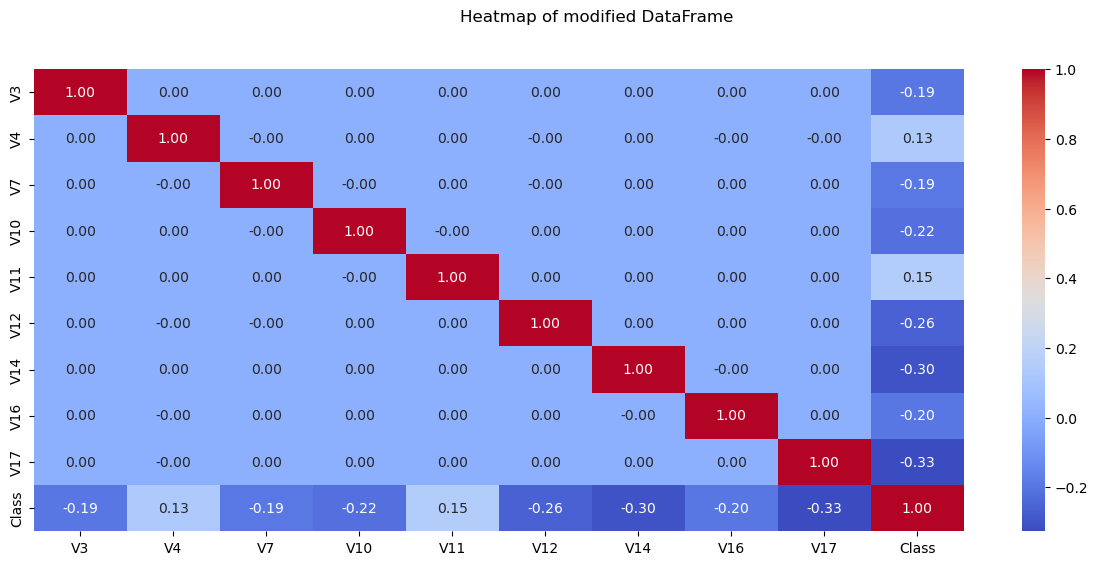

In [ ]:
# Heatmap of modified DataFrame
plt.figure(figsize=(15,6))
plt.suptitle('Heatmap of modified DataFrame')
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()


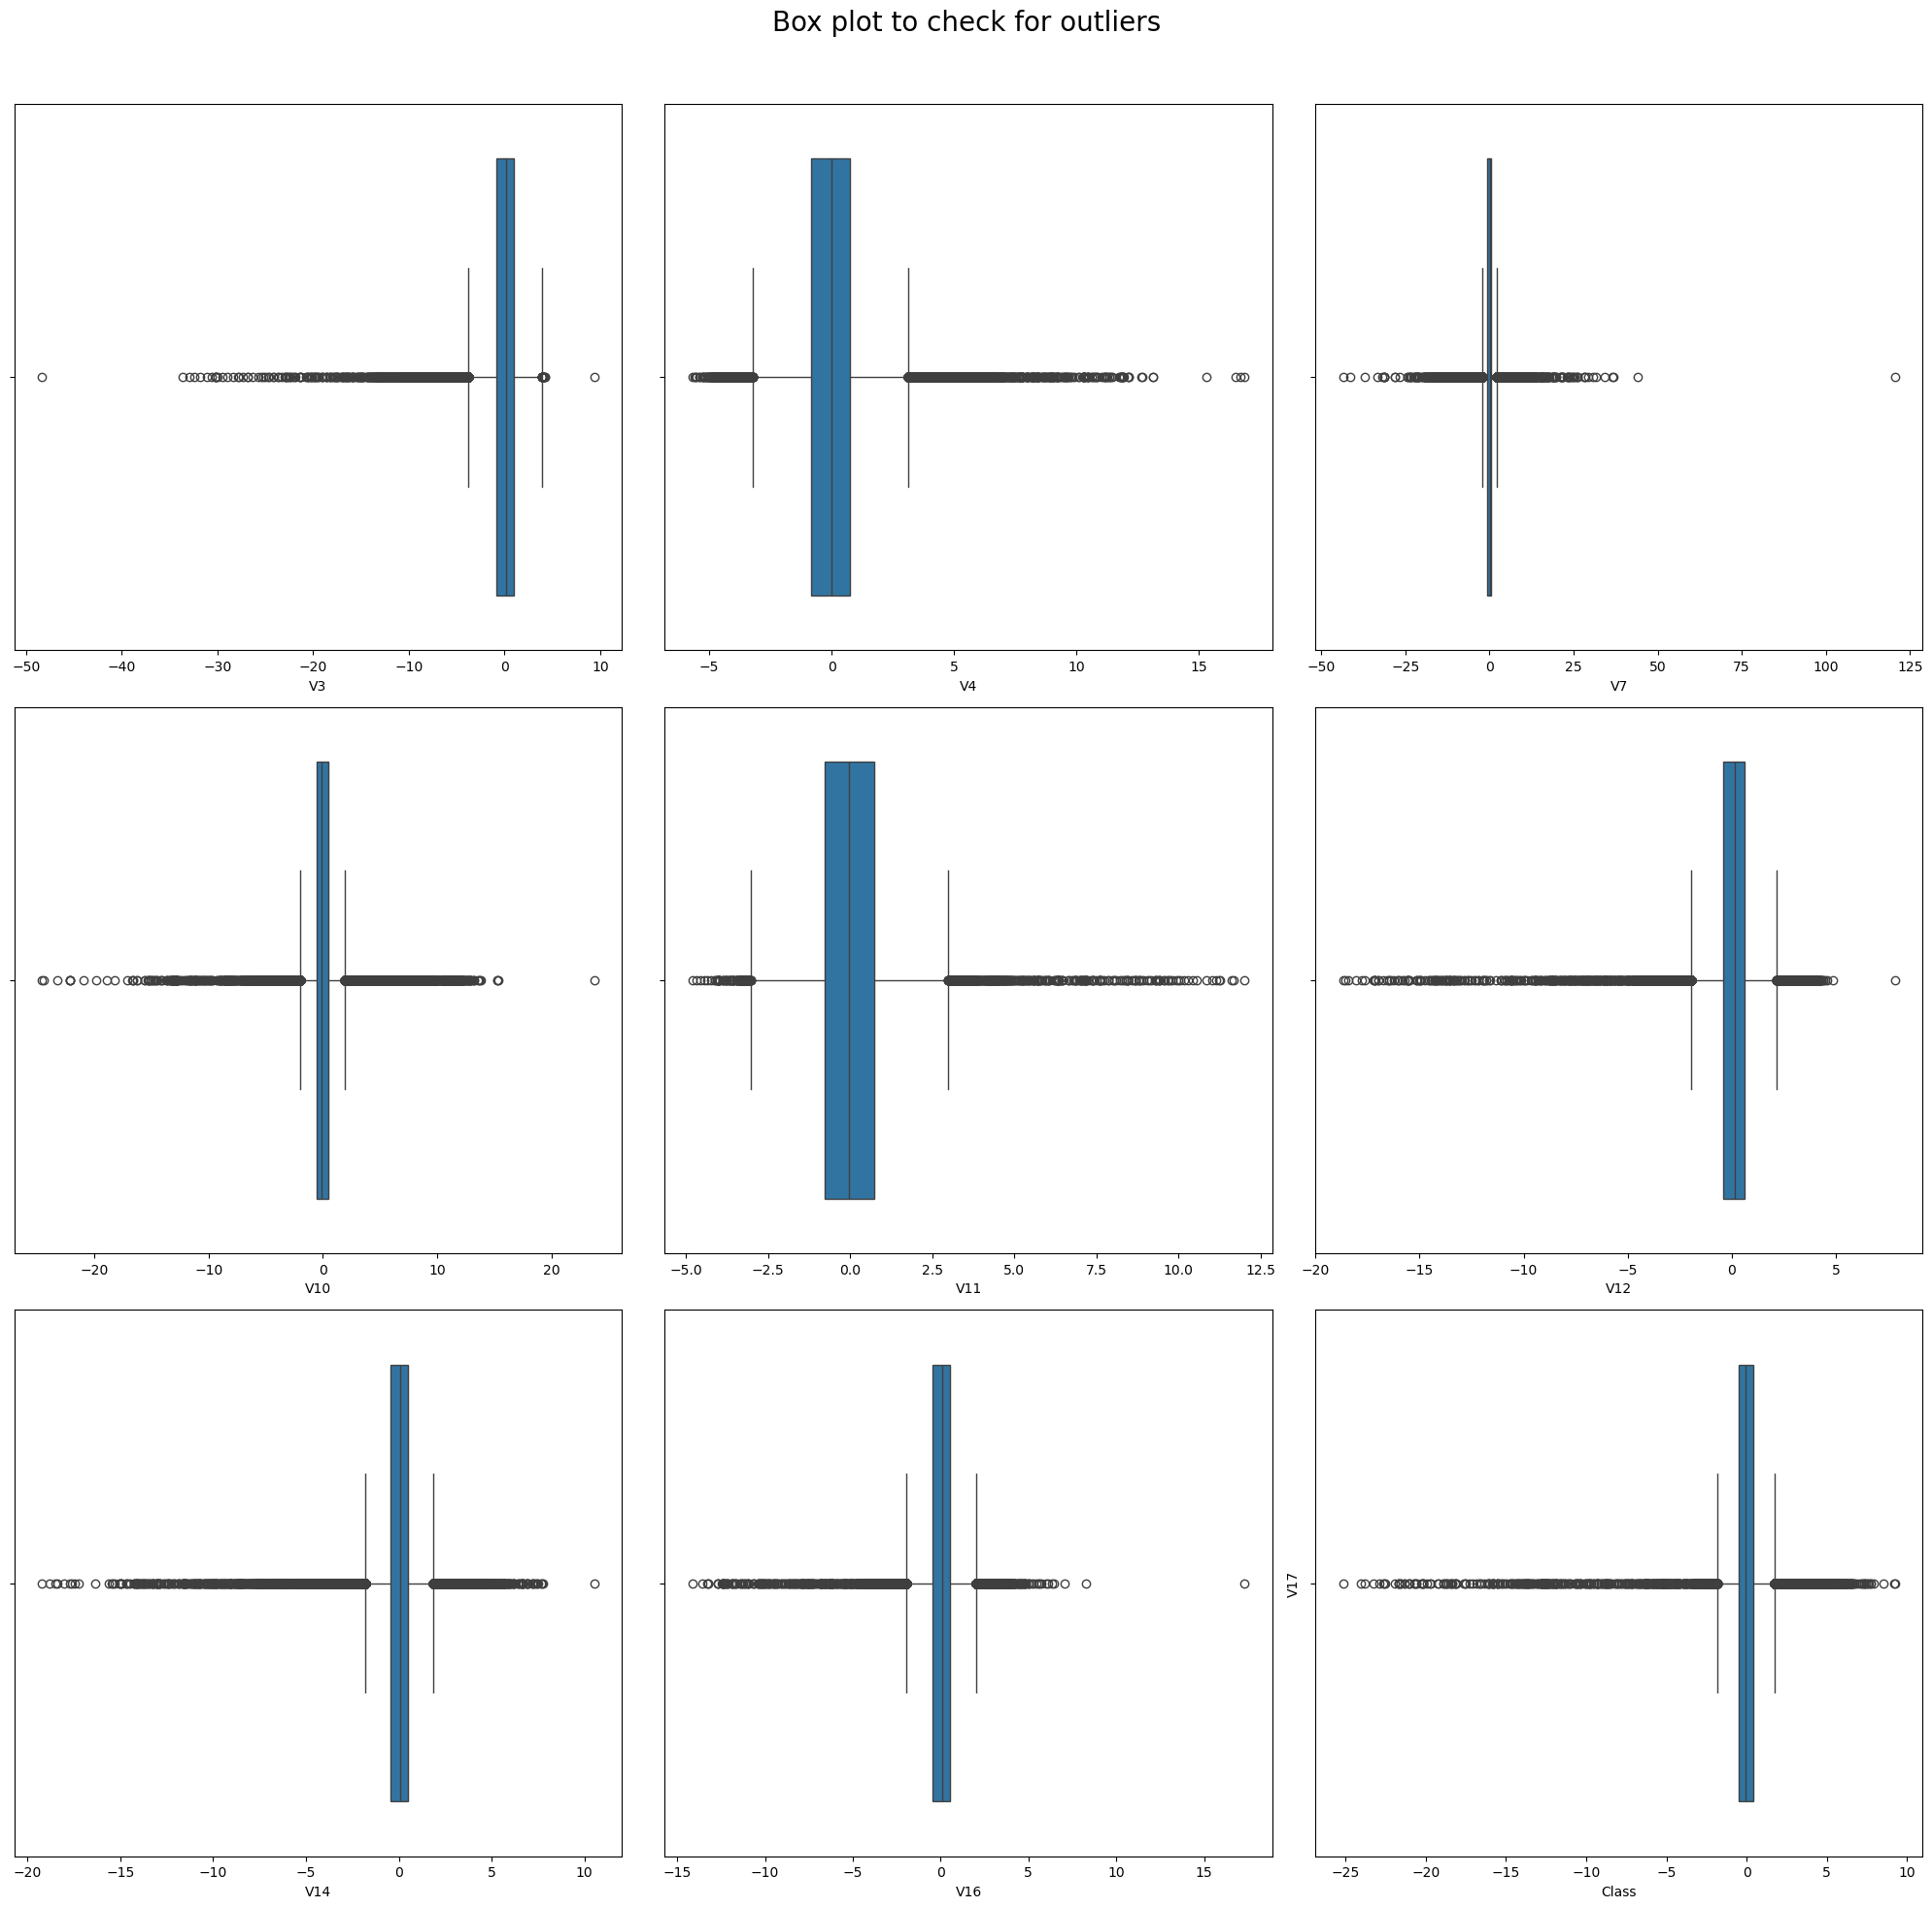

In [ ]:
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
plt.suptitle('Box plot to check for outliers', fontsize=20)

for i,column in enumerate(df.columns[0:10]):
    if i==9:
        continue
    sns.boxplot(df,x=column,ax=ax[i])
    
    plt.xlabel('Class')
    plt.ylabel(column)
    #plt.tight_layout()
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust rect to leave space for the suptitle